# Les Misérables

This Jupyter notebook provides an example of using the Python package [gravis](https://pypi.org/project/gravis). The .ipynb file can be found [here](https://github.com/robert-haas/gravis/tree/master/examples).

It visualizes a **graph of character co-occurence** in the novel **Les Misérables** by Victor Hugo, which is an often used example in libraries dealing with graphs or networks. Here it demonstrates the use of **network analysis** algorithms to generate **graph annotations**, which in turn have effect on visual elements of the plot. It is also an example of displaying **images inside nodes**.


## References

- Wikipedia
  - [Les Misérables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables): "a French historical novel by Victor Hugo, first published in 1862, one of the greatest novels of the 19th century"
- Donald Knuth
  - [The Stanford GraphBase](https://www-cs-faculty.stanford.edu/~knuth/sgb.html): "Since the **data files were prepared by hand**, they are subject to human error. They should therefore not be considered to be definite sources of facts, which are correctible like an article in the Wikipedia. They are intended simply as forever-frozen examples of typical data that is more or less accurate. In particular, I recently learned that I **forgot to include any connection between Fantine and her infant daughter Cosette**, when I summarized the encounters between the characters of Les Misérables in the data file jean.dat."
- NetworkX
  - [les_miserables_graph()](https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html) function returning the Les Misérables graph
- graph-tool
  - [Dataset collection](https://graph-tool.skewed.de/static/doc/collection.html) with Les Misérables graph
- d3.js
  - [Force-directed graph](https://observablehq.com/@d3/force-directed-graph) of Les Misérables graph
  - [Adjacency matrix representation](https://bost.ocks.org/mike/miserables/) of Les Misérables graph
- vis.js
  - [Network visualization](https://visjs.github.io/vis-network/examples/network/exampleApplications/lesMiserables.html) of Les Misérables graph

In [1]:
import gravis as gv
import networkx as nx

## Create the graph

In [2]:
graph = nx.les_miserables_graph()

## Add annotations

In [3]:
def detect_communities(graph, num_communities):
    community_generator = nx.algorithms.community.girvan_newman(graph)
    for i in range(num_communities-1):
        communities = next(community_generator)
    return communities


def assign_node_color_by_community(graph, communities, colors=None):
    if colors is None:
        colors = ['blue', 'orange', 'green', 'red', 'darkviolet',
                  'brown', 'pink', 'gray', 'yellowgreen', 'lightblue']
    for community_number, community in enumerate(communities):
        for member in community:
            graph.nodes[member]['color'] = colors[community_number % len(colors)]
    return graph


def assign_node_position_by_community(graph, communities):
    x_shift = -450
    y_shift = -300
    for community_number, community in enumerate(communities):
        sorted_community_members = sorted(list(community), key=lambda name: graph.nodes[name]['size'])
        for member_number, member in enumerate(sorted_community_members):
            graph.nodes[member]['x'] = x_shift + member_number * 65
            graph.nodes[member]['y'] = y_shift + community_number * 65
            graph.nodes[member]['z'] = 0
    return graph


def assign_node_size_by_degree(graph):
    for node_id in graph.nodes:
        graph.nodes[node_id]['size'] = 5 + graph.degree[node_id]
    return graph


def assign_edge_size_by_centrality(graph):
    edge_centralities = nx.algorithms.centrality.edge_betweenness_centrality(graph)
    for edge_id, centrality_value in edge_centralities.items():
        graph.edges[edge_id]['size'] = 0.25 + centrality_value * 50.0
    return graph


def assign_edge_color_by_node_colors(graph):
    for edge_id in graph.edges:
        edge = graph.edges[edge_id]
        source = graph.nodes[edge_id[0]]
        target = graph.nodes[edge_id[1]]
        edge['color'] = source['color'] if source['color'] == target['color'] else 'gray'
    return graph


def assign_node_image_by_urls(graph):
    base = 'https://upload.wikimedia.org/wikipedia/commons/'
    mapping = [
        ('Valjean', base + 'thumb/f/fd/Monsieur_Madeleine_par_Gustave_Brion.jpg/167px-Monsieur_Madeleine_par_Gustave_Brion.jpg'),
        ('Javert', base + 'thumb/7/73/Javert.jpg/162px-Javert.jpg'),
        ('Fantine', base + 'thumb/6/69/%C3%89mile_Bayard_-_Il_lui_ferma_les_yeux.jpg/179px-%C3%89mile_Bayard_-_Il_lui_ferma_les_yeux.jpg'),
        ('Cosette', base + '9/99/Ebcosette.jpg'),
        ('Marius', base + 'thumb/b/b6/Marius_sees_Cosette.jpg/170px-Marius_sees_Cosette.jpg'),
        ('Enjolras', base + 'thumb/b/b4/Friends_of_the_ABC.jpg/170px-Friends_of_the_ABC.jpg'),
        ('Eponine', base + 'thumb/a/a3/Death_of_Eponine_-_Les_Miserables.jpg/142px-Death_of_Eponine_-_Les_Miserables.jpg'),
        ('Gavroche', base + 'thumb/e/e6/Gavroche_%28Les_Mis%C3%A9rables%29.jpg/162px-Gavroche_%28Les_Mis%C3%A9rables%29.jpg'),
        ('Thenardier', base + 'thumb/3/35/Thenard.jpg/199px-Thenard.jpg'),
        ('Myriel', base + 'thumb/a/a9/Mgr_Bienvenu_par_Gustave_Brion.jpg/144px-Mgr_Bienvenu_par_Gustave_Brion.jpg'),
    ]
    for name, url in mapping:
        conv = gv.convert.image_to_data_url(url)
        graph.nodes[name]['image'] = conv
    return graph


def assign_node_hover_messages(graph):
    base = ('<span style="color:$color;font-style:italic">{}</span>'
            '<br><img src="$image" style="margin:10px;max-height:150px;max-width:150px;"></img>')
    graph.nodes['Valjean']['hover'] = base.format('Valjean')
    graph.nodes['Javert']['hover'] = base.format('Javert')
    graph.nodes['Fantine']['hover'] = base.format('Fantine')
    graph.nodes['Cosette']['hover'] = base.format('Cosette')
    graph.nodes['Marius']['hover'] = base.format('Marius')
    graph.nodes['Enjolras']['hover'] = base.format('Enjolras') 
    graph.nodes['Eponine']['hover'] = base.format('Eponine') 
    graph.nodes['Gavroche']['hover'] = base.format('Gavroche') 
    graph.nodes['Thenardier']['hover'] = base.format('Thenardier')
    graph.nodes['Myriel']['hover'] = base.format('Myriel')
    return graph

In [4]:
# Size from centrality calculation
graph = assign_node_size_by_degree(graph)
graph = assign_edge_size_by_centrality(graph)

# Color and position from community detection
communities = detect_communities(graph, 11)
graph = assign_node_color_by_community(graph, communities)
graph = assign_edge_color_by_node_colors(graph)
graph = assign_node_position_by_community(graph, communities)

# Images and hover messages from data on the web
graph = assign_node_image_by_urls(graph)
graph = assign_node_hover_messages(graph)

# Click messages from using $ syntax to use information from other properties
graph.graph['node_click'] = (
    '<ul>'
    ' <li>Id:           $id</li>'
    ' <li>Label:        $label</li>'
    ' <li>Color:        $color</li>'
    ' <li>Opacity:      $opacity</li>'
    ' <li>Size:         $size</li>'
    ' <li>Shape:        $shape</li>'
    ' <li>Border color: $border_color</li>'
    ' <li>Border size:  $border_size</li>'
    ' <li>Label color:  $label_color</li>'
    ' <li>Label size:   $label_size</li>'
    ' <li>Hover:        $hover</li>'
    ' <li>x:            $x</li>'
    ' <li>y:            $y</li>'
    '</ul>'
)

graph.graph['edge_click'] = (
    '<ul>'
    ' <li>Id:           $id</li>'
    ' <li>Label:        $label</li>'
    ' <li>Color:        $color</li>'
    ' <li>Opacity:      $opacity</li>'
    ' <li>Size:         $size</li>'
    ' <li>Label color:  $label_color</li>'
    ' <li>Label size:   $label_size</li>'
    ' <li>Hover:        $hover</li>'
    '</ul>'
)

# General options
graph.graph['node_border_size'] = 2
graph.graph['node_border_color'] = 'white'
graph.graph['edge_color'] = 'black'
graph.graph['edge_opacity'] = 0.9

## Plot the annotated graph


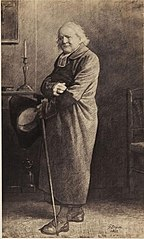
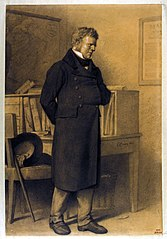
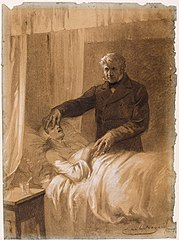
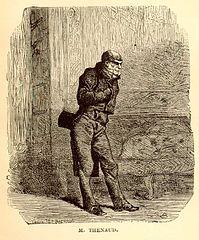
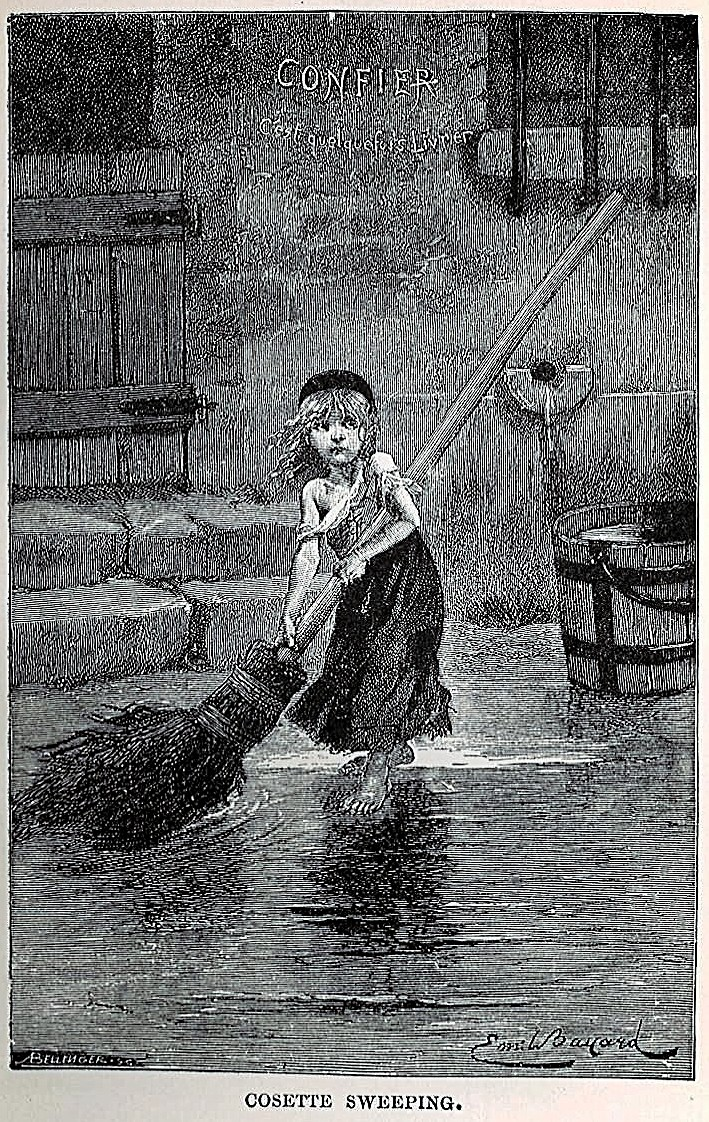
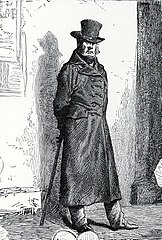
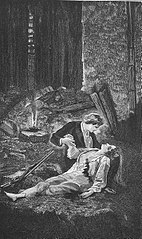
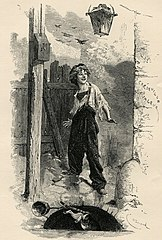
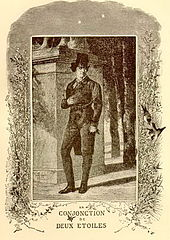
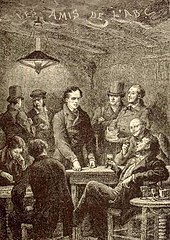

In [5]:
gv.d3(graph, node_image_size_factor=2.5)


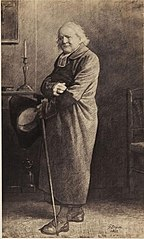
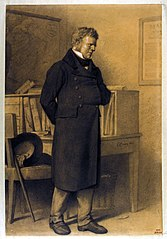
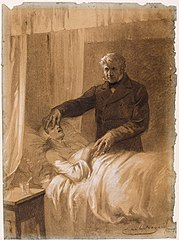
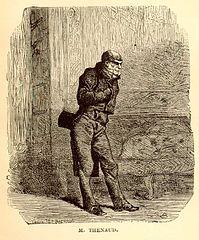
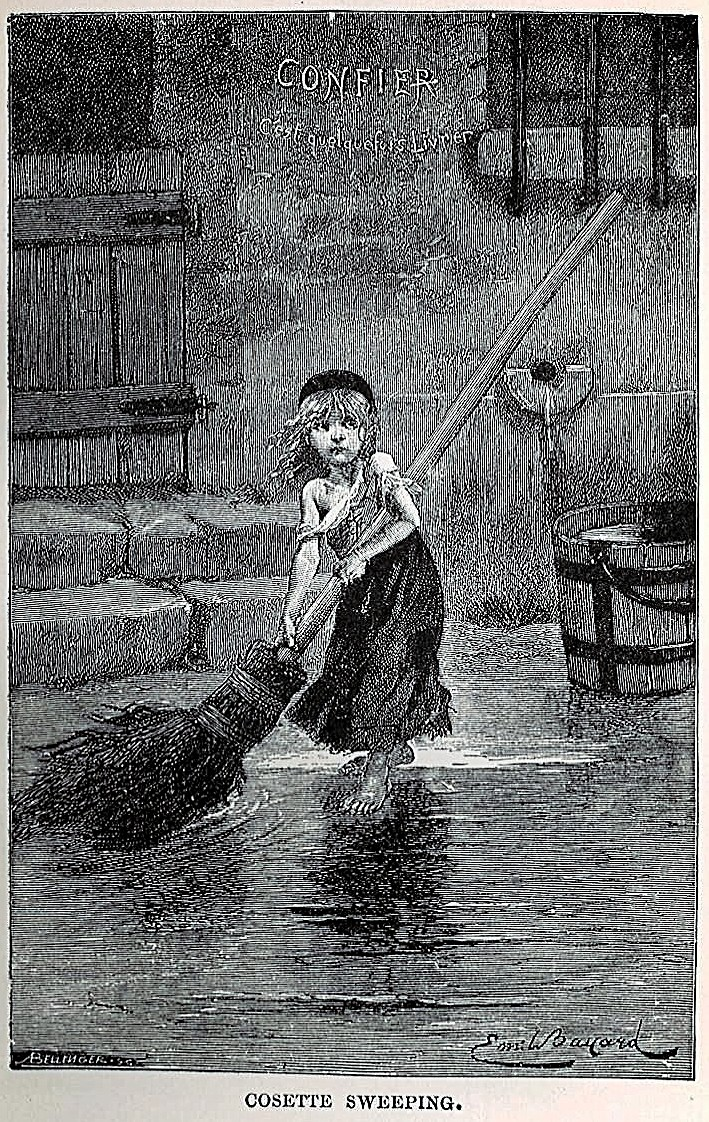
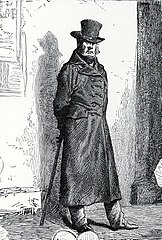
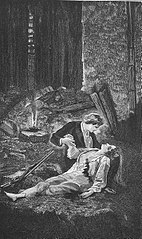
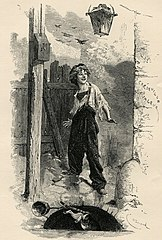
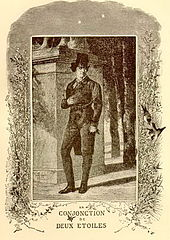
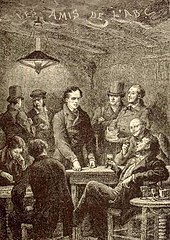

In [6]:
gv.vis(graph, node_image_size_factor=2.5)


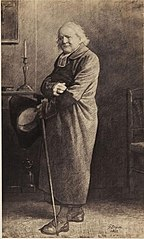
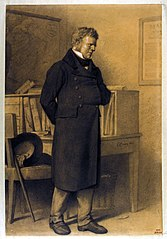
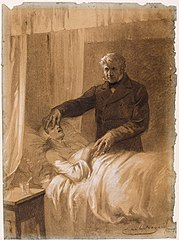
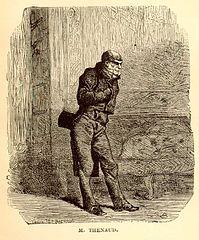
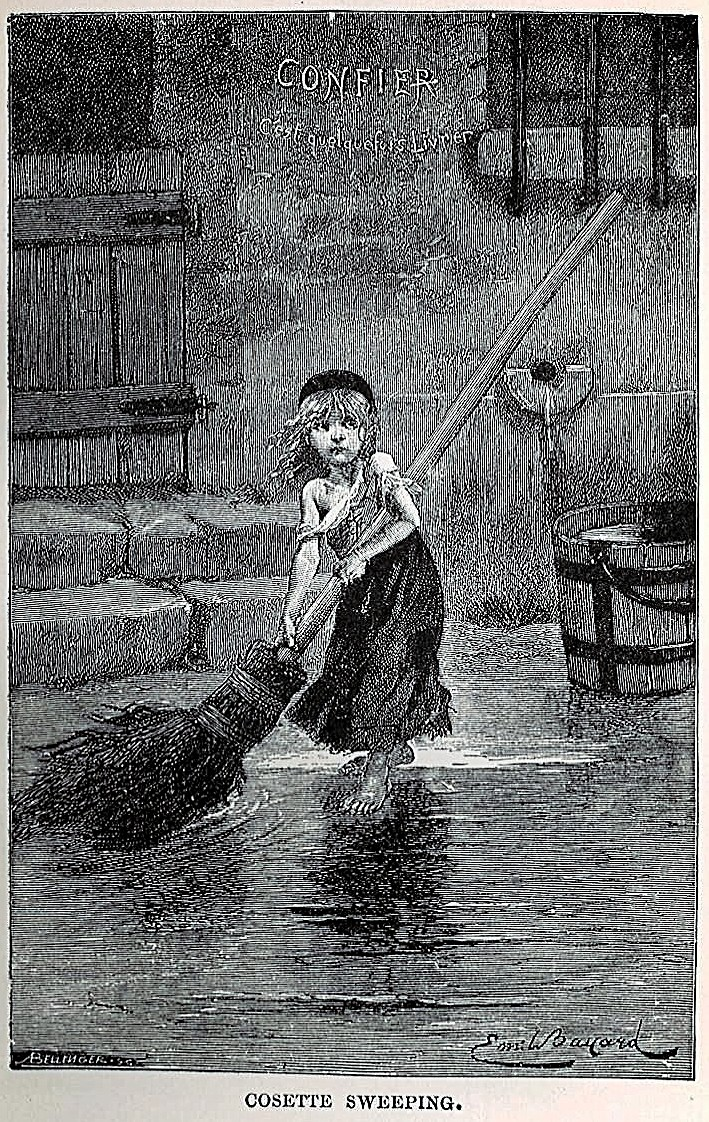
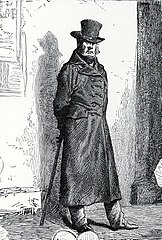
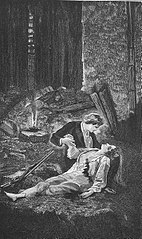
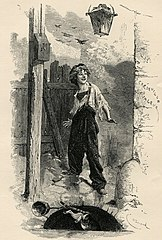
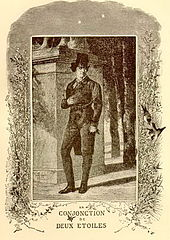
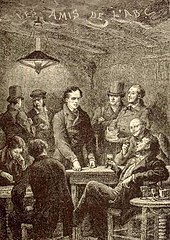

In [7]:
gv.three(graph, node_image_size_factor=1.5)